In [ ]:
!pip -q install qpsolvers[open_source_solvers]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.9/959.9 kB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.8/452.8 kB 33.7 MB/s eta 0:00:00


In [ ]:
!pip install -q pyomo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.0 MB/s eta 0:00:00


In [ ]:
from qpsolvers import solve_qp

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
interest_rate = pd.read_csv('Lab08_InterestRate.csv')
interest_rate

Year  Interest Rate   Ratio  Rating
0   2003         0.0416  0.3615    85.6
1   2004         0.0312  0.2820    91.9
2   2005         0.0354  0.3010    89.1
3   2006         0.0331  0.3862    90.4
4   2007         0.0399  0.3578    86.3
5   2008         0.0501  0.4413    74.7
6   2009         0.0421  0.6753    79.8
7   2010         0.0507  0.6777    74.3
8   2011         0.0431  0.6585    84.4
9   2012         0.0437  0.6702    84.1
10  2013         0.0398  0.3289    86.8
11  2014         0.0274  0.2473    93.7
12  2015         0.0298  0.2762    92.3
13  2016         0.0261  0.3222    94.0
14  2017         0.0358  0.2792    88.9
15  2018         0.0504  0.3609    74.3
16  2019         0.0478  0.6187    74.0
17  2020         0.0549  0.6176    69.8
18  2021         0.0468  0.6004    81.6
19  2022         0.0478  0.6119    81.0

In [ ]:
#Answer1
D = [[1],[interest_rate.iloc[0,2]],[interest_rate.iloc[0,3]]]
D

[[1], [0.3615], [85.6]]

In [ ]:
D_tran = np.transpose(D)
P = D*D_tran
r = interest_rate.iloc[0,1]
q = np.multiply(D,-2*r)
q

array([[-0.0832   ],
       [-0.0300768],
       [-7.12192  ]])

In [ ]:
print(P)
r

[[1000.    18.    11. ]
 [  12.  1044.    26. ]
 [  11.     2.6 1411. ]]


0.04464516368528433

In [ ]:
i=0
P=[[0,0,0],[0,0,0],[0,0,0]]
q=[[0],[0],[0]]
for i in range(20):
  D = [[1],[interest_rate.iloc[i,2]],[interest_rate.iloc[i,3]]]
  D_tran = np.transpose(D)
  p = (D)*(D_tran)
  r = interest_rate.iloc[i,1]
  qu = np.multiply(D,-2*r)
  P = P + p
  q = q + qu

P= np.multiply(P,2)
print(P)
print(q)


[[4.00000000e+01 1.81496000e+01 3.35400000e+03]
 [1.81496000e+01 9.25515268e+00 1.49040692e+03]
 [3.35400000e+03 1.49040692e+03 2.83313880e+05]]
[[  -1.635     ]
 [  -0.77927632]
 [-134.82612   ]]


In [ ]:
x=solve_qp(P, q, None, None, None, None, None, None, solver = "osqp")
x

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


array([ 0.12237613,  0.00576031, -0.00100316])

In [ ]:
rf=[]
for i in range(20):
  Ra = np.array([1,interest_rate.iloc[i,2],interest_rate.iloc[i,3]])
  r = np.matmul(Ra,x)
  rf.append(r)
print(rf)
print(x)



[0.03858826079811187, 0.03181042835378389, 0.03472871326461463, 0.03391538785180524, 0.03786473789597443, 0.049982342581879086, 0.046214155494765985, 0.05174534259877561, 0.04150286103922274, 0.04187120370481549, 0.03719668653869093, 0.029804863367602574, 0.03137575583831592, 0.029935363553803884, 0.034803769863696044, 0.04992047636957979, 0.05170643134263811, 0.05591335353090378, 0.04397702604389504, 0.04464516368528433]
[ 0.12237613  0.00576031 -0.00100316]


In [ ]:
ForecastedIntRate=rf
ActualRate=[]
for i in range(20):
  Act_Rat=interest_rate.iloc[i,1]
  ActualRate.append(Act_Rat)
x=np.linspace(2003,1,2023)
print(ActualRate)
print(ForecastedIntRate)
print(x)
print(len(ForecastedIntRate))

[0.0416, 0.0312, 0.0354, 0.0331, 0.0399, 0.0501, 0.0421, 0.0507, 0.0431, 0.0437, 0.0398, 0.0274, 0.0298, 0.0261, 0.0358, 0.0504, 0.0478, 0.0549, 0.0468, 0.0478]
[0.03858826079811187, 0.03181042835378389, 0.03472871326461463, 0.03391538785180524, 0.03786473789597443, 0.049982342581879086, 0.046214155494765985, 0.05174534259877561, 0.04150286103922274, 0.04187120370481549, 0.03719668653869093, 0.029804863367602574, 0.03137575583831592, 0.029935363553803884, 0.034803769863696044, 0.04992047636957979, 0.05170643134263811, 0.05591335353090378, 0.04397702604389504, 0.04464516368528433]
[2.00300000e+03 2.00200989e+03 2.00101978e+03 ... 2.98021761e+00
 1.99010880e+00 1.00000000e+00]
20


In [ ]:
ActualRate

[0.0416,
 0.0312,
 0.0354,
 0.0331,
 0.0399,
 0.0501,
 0.0421,
 0.0507,
 0.0431,
 0.0437,
 0.0398,
 0.0274,
 0.0298,
 0.0261,
 0.0358,
 0.0504,
 0.0478,
 0.0549,
 0.0468,
 0.0478]

In [ ]:
ForecastedIntRate

[0.03858826079811187,
 0.03181042835378389,
 0.03472871326461463,
 0.03391538785180524,
 0.03786473789597443,
 0.049982342581879086,
 0.046214155494765985,
 0.05174534259877561,
 0.04150286103922274,
 0.04187120370481549,
 0.03719668653869093,
 0.029804863367602574,
 0.03137575583831592,
 0.029935363553803884,
 0.034803769863696044,
 0.04992047636957979,
 0.05170643134263811,
 0.05591335353090378,
 0.04397702604389504,
 0.04464516368528433]

In [ ]:
ForecastedIntRate=rf
ActualRate=[]
for i in range(20):
  Act_Rat=interest_rate.iloc[i,1]
  ActualRate.append(Act_Rat)
x=np.linspace(2003,1,2023)
print(ActualRate)
print(ForecastedIntRate)
print(x)

[0.0416, 0.0312, 0.0354, 0.0331, 0.0399, 0.0501, 0.0421, 0.0507, 0.0431, 0.0437, 0.0398, 0.0274, 0.0298, 0.0261, 0.0358, 0.0504, 0.0478, 0.0549, 0.0468, 0.0478]
[0.03858826079811187, 0.03181042835378389, 0.03472871326461463, 0.03391538785180524, 0.03786473789597443, 0.049982342581879086, 0.046214155494765985, 0.05174534259877561, 0.04150286103922274, 0.04187120370481549, 0.03719668653869093, 0.029804863367602574, 0.03137575583831592, 0.029935363553803884, 0.034803769863696044, 0.04992047636957979, 0.05170643134263811, 0.05591335353090378, 0.04397702604389504, 0.04464516368528433]
[2.00300000e+03 2.00200989e+03 2.00101978e+03 ... 2.98021761e+00
 1.99010880e+00 1.00000000e+00]


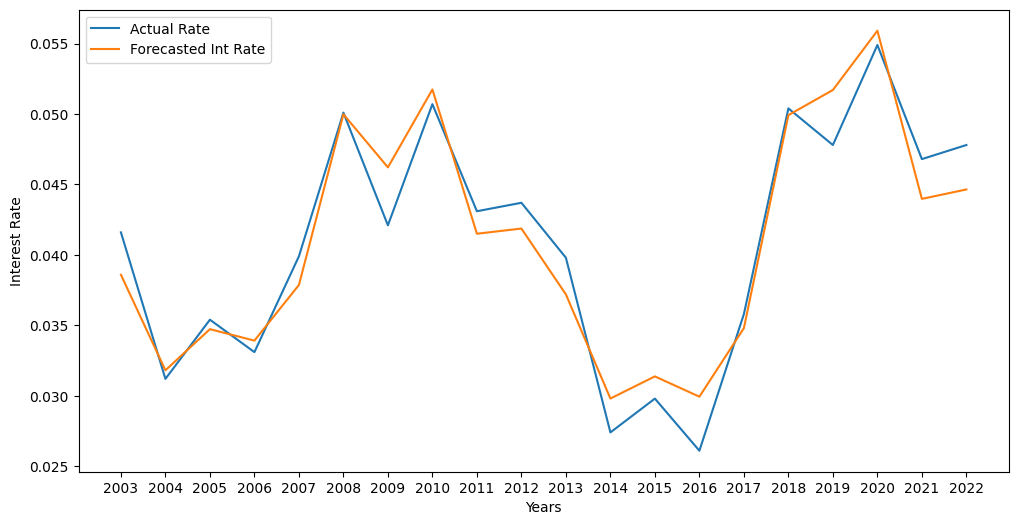

In [ ]:
plt.figure(figsize=(12,6))
x=np.linspace(2003,2022,20)

plt.xticks(x)

plt.plot(x,ActualRate, label='Actual Rate')
plt.plot(x,ForecastedIntRate, label='Forecasted Int Rate')

plt.xlabel('Years')
plt.ylabel('Interest Rate')
plt.legend()
plt.show()

In [ ]:
#Answer:2
'''
Write your optimization formulation from the above description to determine the optimal price for the
product portfolio. Describe your formulation (constraints, objective functions, and support for decision
variables) and assumption along with the necessary assumption used.
'''
P=np.array([[12.982, 0, 0, 0],
            [0, 2.4, 0, 0],
            [0, 0, 0.44, -0.051],
            [0, 0, -0.051, 0.068]])
q=np.array([-6748, -1184, -420.625, -70.41])
G=np.array([[-25.964, -96, -7.08, 0.025],
            [-58.419, -2.4, -5.56, 17.39],
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 0.22, -0.025],
            [0, 0, -0.026, 0.034]])
h=np.array([59861805, 74921464, 1039.59, 986.66, 420.625, 70.41 ])
p=solve_qp(P, q, G, h, None, None, None, None, solver = "osqp")
p

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


array([ 519.79724844,  493.33324177, 1178.42665294, 1919.26152999])

In [ ]:
p1=p[0]
p2=p[1]
p3=p[2]
p4=p[3]
print(p1,p2,p3,p4)

519.7972484369934 493.3332417698846 1178.4266529375418 1919.2615299922597


In [ ]:
#Demand Values
d1=-6.491*p1+6748
d2=-1.2*p2+1184
d3 = -0.22*p3+ 0.25*p4+ 420.625
d4 = -0.26*p3 - 0.034*p4 +70.41
print(d1,d2,d3,d4)

3373.996060395476 592.0001098761385 641.1865188518057 -301.2358217834977


In [ ]:
#Answer-3 part-A

In [ ]:
n = 101 #no. of random points to be taken

#generating randome samples of allocation
samples = []
w1 = np.linspace(0,1,n)
w2 = np.linspace(0,1,n)
for one in w1:
  for two in w2:
    if(one+two <=1):
      samples.append((one,two,1- one -two))

In [ ]:
len(samples)

5151

In [ ]:
#risk function

def risk(sample, covariance):
  return 0.5*np.matmul(sample.transpose(), np.matmul(covariance, sample))

#given data
Mo= 0.03
M = np.array([0.0427,0.0015,0.0285])
covariance = np.array([[0.1,0.0018, 0.0011],[0.0012,0.1044,0.0026],[0.0011,0.00026,0.1411]])


#defining return function
def preturn(sample, M):
  return np.matmul(sample.transpose(), M)


#storing valid results
risks = []
returns = []
allocation = []
for sample in samples:
  w = np.array([sample[0],sample[1],sample[2]])
  #checking constraint
  if np.matmul(w.transpose(), M) >= Mo:
    allocation.append(w)
    risks.append(risk(w,covariance))
    returns.append(preturn(w,M))


In [ ]:
#least risk entry
min(risks)

0.021239954000000002

In [ ]:
allocation[np.argmin(risks)]

array([0.51, 0.21, 0.28])

In [ ]:
returns[np.argmin(risks)]

0.030072

In [ ]:
len(allocation)

1440

In [ ]:
paretopoints = []
n = len(allocation)
for i in range(n):
  flag = 0
  for j in range(n):
    if i!=j:
      if ((risks[i] > risks[j]) and (returns[i] <= returns[j])) or ((risks[i] >= risks[j]) and (returns[i] < returns[j])):
        flag = 1
        break
  if flag == 0:
    paretopoints.append(allocation[i])

In [ ]:
len(paretopoints)

148

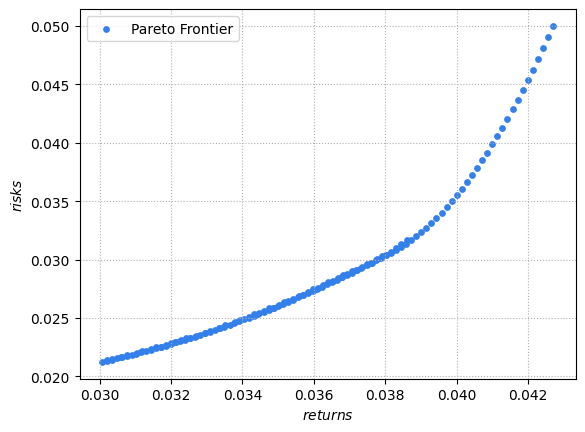

In [ ]:
returnspareto = [preturn(sample,M) for sample in paretopoints]
riskspareto = [risk(sample, covariance) for sample in paretopoints]
# pareto for return risk tradeoff

plt.scatter(returnspareto, riskspareto ,color = "#3480eb", s =15)
plt.xlabel("$returns$")
plt.ylabel("$risks$")
plt.grid(linestyle = ":")
plt.legend(labels = ["Pareto Frontier"])

In [ ]:
#finding optimal allocation using ;risk avertion

lamda = [10**((v/20)-1) for v in range(1,101)]

In [ ]:
#since problem is not maximize we minimize the negative, P = lamda*covariance, q = -M
!pip -q install qpsolvers[open_source_solvers]
from qpsolvers import solve_qp

In [ ]:
results = []
for lm in lamda:
  P  = lm*covariance
  q = -M
  b=np.array([1])
  A = np.array([1, 1, 1])
  lb = np.array([0,0,0])
  res = solve_qp(P, q, G=None, h=None, A = A, b = b, lb=lb, ub=None, solver = "osqp")
  results.append(res)

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted A to scipy.sparse.csc.csc_matrix
For best performance, build A as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


In [ ]:
results

[array([ 1.00004232e+00, -1.90538606e-05, -2.32501202e-05]),
 array([ 1.00008123e+00, -3.66137758e-05, -4.45868278e-05]),
 array([ 1.00295778, -0.00166064, -0.00158207]),
 array([ 0.96181114, -0.00155688,  0.03946662]),
 array([ 9.20273380e-01, -6.01997596e-06,  7.97326438e-02]),
 array([ 8.83931245e-01, -1.85132004e-05,  1.16087276e-01]),
 array([ 8.51552489e-01, -4.88358744e-05,  1.48496366e-01]),
 array([ 8.22716063e-01, -1.12134726e-04,  1.77396113e-01]),
 array([ 7.97049434e-01, -2.26595533e-04,  2.03177243e-01]),
 array([ 7.74218956e-01, -4.05720508e-04,  2.26186910e-01]),
 array([7.53541389e-01, 2.00455782e-11, 2.46458612e-01]),
 array([ 7.35323517e-01, -4.70134477e-09,  2.64676489e-01]),
 array([ 0.7195128 , -0.00073082,  0.28121829]),
 array([ 7.04860707e-01, -4.20087803e-04,  2.95559537e-01]),
 array([ 0.69267072, -0.00187559,  0.30895677]),
 array([0.67641814, 0.00629502, 0.31704444]),
 array([0.64391939, 0.04449718, 0.3113506 ]),
 array([0.61495216, 0.07854449, 0.30627403])

In [ ]:
returnslamda = [preturn(res,M) for res in results]
riskslamda = [risk(res, covariance) for res in results]
# pareto for return risk tradeoff

plt.scatter(np.log(lamda), riskslamda ,color = "#3480eb", s =15)
# plt.xlabel("$returns$")
# plt.ylabel("$risks$")
# plt.grid(linestyle = ":")
# plt.legend(labels = ["Pareto Frontier"])

In [ ]:
plt.scatter(np.log(lamda), riskslamda ,color = "#3480eb", s =15)